<a href="https://colab.research.google.com/github/axpat/Retail-Sales-Prediction/blob/main/Retail_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Solution Work:**

In [ ]:
  # Importing the libraries
    
    import numpy as np
    import pandas as pd
    pd.pandas.set_option('display.max_columns' , None)
    import matplotlib.pyplot as plt
    from numpy import math
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error

    import warnings    
    warnings.filterwarnings('ignore')
    

In [2]:
#Mounting Google Drive for File Access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


#Setting up the Folder Path where the file is kept
file_path = '/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv'
file_path1 ='/content/drive/MyDrive/Colab Notebooks/store.csv'
df_sales = pd.read_csv(file_path)
df_store = pd.read_csv(file_path1)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
# setting configuration for our plots
plt.rcParams['figure.figsize'] = (20, 7)

Text(176.0, 0.5, 'NullValues in yellow shadow.')

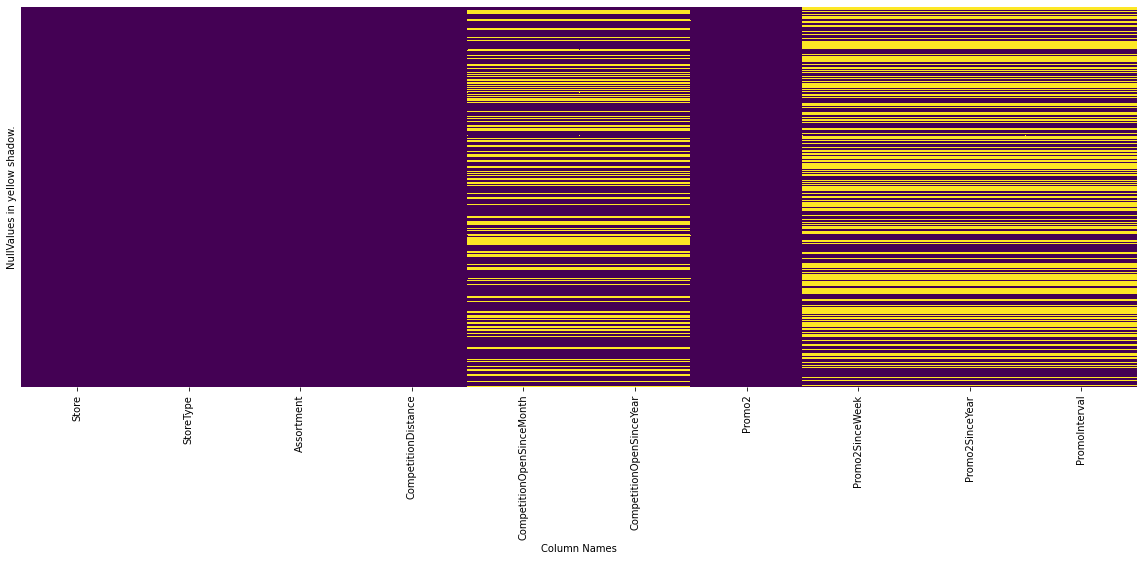

In [9]:
sns.heatmap(df_store.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xlabel('Column Names')
plt.ylabel('NullValues in yellow shadow.')

In [10]:
df_store.columns


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [11]:
df_store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
df_sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
df_store[df_store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [15]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [16]:

df_store[df_store['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
df_store[df_store['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
df_store[df_store['Promo2SinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [19]:
df_store[df_store['PromoInterval'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [20]:
df_store['CompetitionOpenSinceMonth_null']=np.where(df_store['CompetitionOpenSinceMonth'].isnull(),1,0)
###find percentage error
df_store['CompetitionOpenSinceMonth_null'].mean()

0.31748878923766816

In [21]:
df_store['CompetitionOpenSinceYear_null']=np.where(df_store['CompetitionOpenSinceYear'].isnull(),1,0)
###find percentage error
df_store['CompetitionOpenSinceYear_null'].mean()

0.31748878923766816

In [22]:
df_store['Promo2SinceYear_null']=np.where(df_store['Promo2SinceYear'].isnull(),1,0)
###find percentage error
df_store['Promo2SinceYear_null'].mean()

0.48789237668161434

In [23]:
df_store['Promo2SinceWeek_null']=np.where(df_store['Promo2SinceWeek'].isnull(),1,0)
###find percentage error
df_store['Promo2SinceWeek_null'].mean()

0.48789237668161434

In [24]:
df_store['PromoInterval_null']=np.where(df_store['PromoInterval'].isnull(),1,0)
###find percentage error
df_store['PromoInterval_null'].mean()

0.48789237668161434

In [25]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSinceMonth_null', 'CompetitionOpenSinceYear_null',
       'Promo2SinceYear_null', 'Promo2SinceWeek_null', 'PromoInterval_null'],
      dtype='object')

In [26]:
#df2= df_store.drop('Store', axis=1, inplace=True)
#df2.corr()

In [27]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth_null,CompetitionOpenSinceYear_null,Promo2SinceYear_null,Promo2SinceWeek_null,PromoInterval_null
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,0,1,1,1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,0,1,1,1
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0,0,1,1,1
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1,1
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1,1


In [28]:
df_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [29]:
#Check the percentage of nan values present in each feature
features_with_na=[features for features in df_store.columns if df_store[features].isnull().sum()>1]
for feature in features_with_na:
     print(feature,np.round(df_store[feature].isnull().mean(),4,) , '     % of missing values')

CompetitionDistance 0.0027      % of missing values
CompetitionOpenSinceMonth 0.3175      % of missing values
CompetitionOpenSinceYear 0.3175      % of missing values
Promo2SinceWeek 0.4879      % of missing values
Promo2SinceYear 0.4879      % of missing values
PromoInterval 0.4879      % of missing values


In [30]:
df_store.shape

(1115, 15)

In [31]:
df3=pd.merge(df_sales,df_store,on="Store",how='left')

In [32]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth_null,CompetitionOpenSinceYear_null,Promo2SinceYear_null,Promo2SinceWeek_null,PromoInterval_null
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,0,1,1,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,0,1,1,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0,0,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1,1


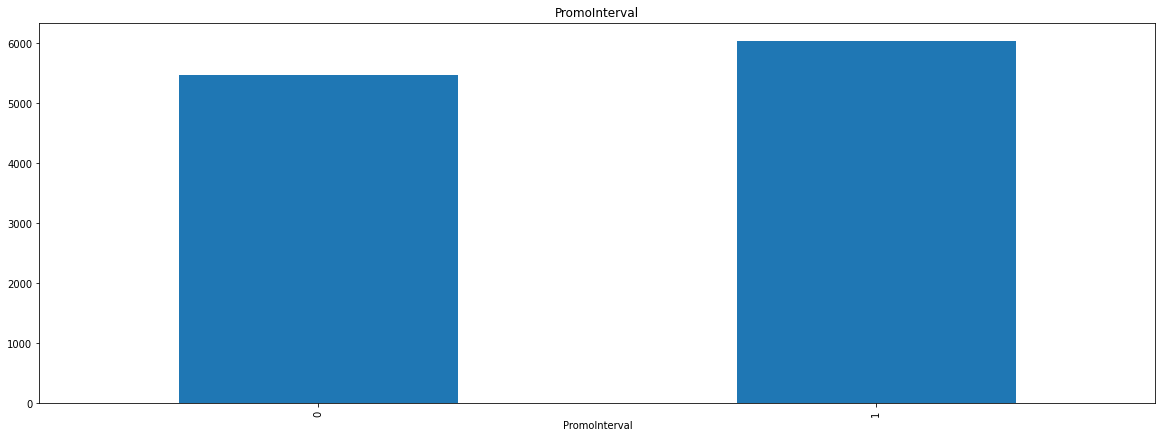

In [33]:
#Finding relationship between missing values and Sales price
for feature in features_with_na:
  data=df3.copy()
   
# Lets make a variable that indicates 1 if the observation was missing
  data[feature]=np.where(data[feature].isnull(), 1, 0)

#calculate sales count where information is missing
data.groupby(feature)['Sales'].median().plot.bar()
plt.title(feature)
plt.show()

In [86]:
#Check the percentage of nan values present in each feature
features_with_na=[features for features in df3.columns if df3[features].isnull().sum()>0]
for feature in features_with_na:
     print(feature,np.round(df3[feature].isnull().mean(),4,) , '     % of missing values')

CompetitionDistance 0.0026      % of missing values
CompetitionOpenSinceMonth 0.3179      % of missing values
CompetitionOpenSinceYear 0.3179      % of missing values
Promo2SinceWeek 0.4994      % of missing values
Promo2SinceYear 0.4994      % of missing values
PromoInterval 0.4994      % of missing values


In [87]:
#Check the percentage of nan values present in each feature
features_with_na=[features for features in df3.columns if df3[features].isnull().sum()>1]
for feature in features_with_na:
     print(feature,np.round(df3[feature].isnull().mean(),4,) , '     % of missing values')

CompetitionDistance 0.0026      % of missing values
CompetitionOpenSinceMonth 0.3179      % of missing values
CompetitionOpenSinceYear 0.3179      % of missing values
Promo2SinceWeek 0.4994      % of missing values
Promo2SinceYear 0.4994      % of missing values
PromoInterval 0.4994      % of missing values


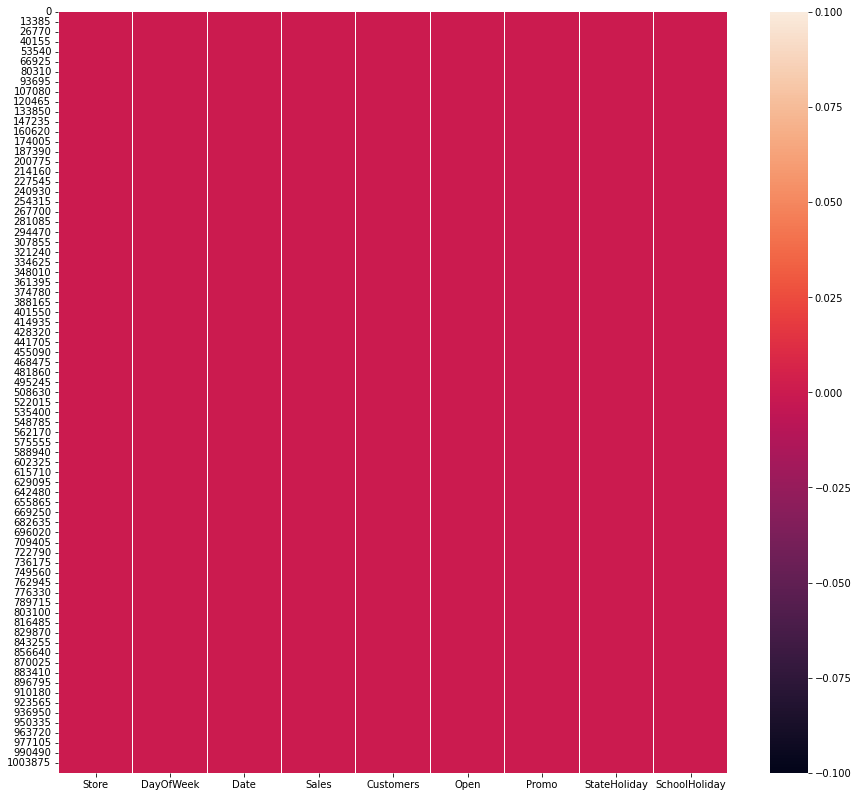

In [36]:
plt.figure(figsize=(15,14))
sns.heatmap(df_sales.isnull())

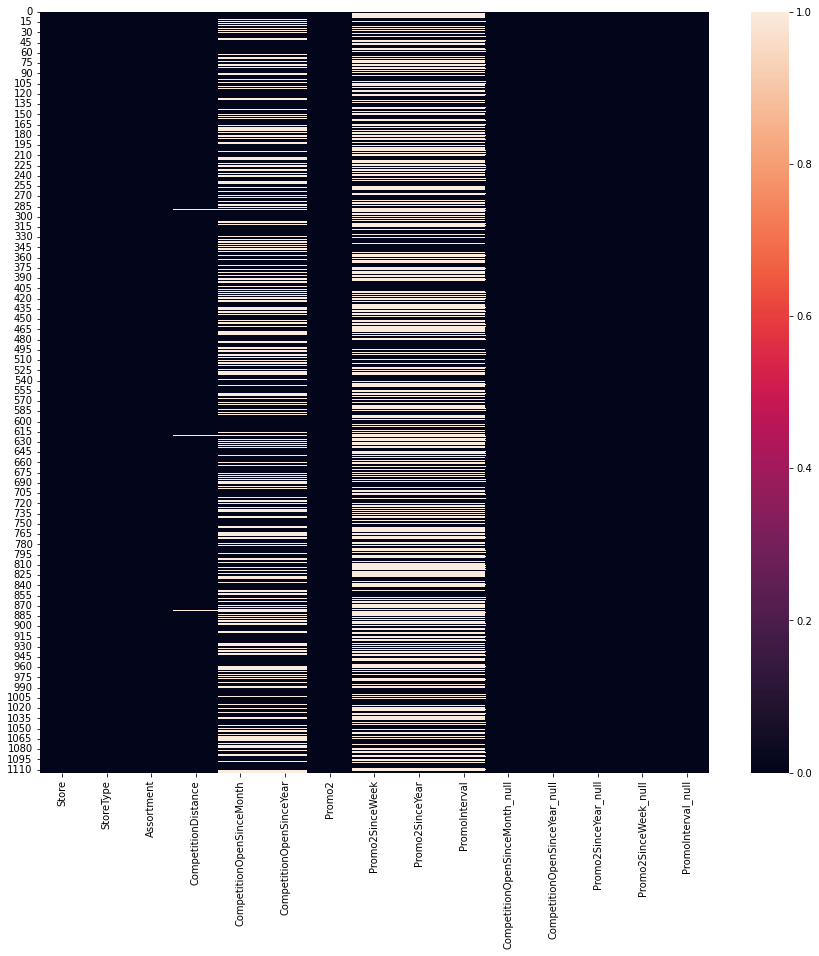

In [37]:
plt.figure(figsize=(15,14))
sns.heatmap(df_store.isnull())

In [38]:
df_store.isnull().sum()/df_store.shape[0]*100

Store                              0.000000
StoreType                          0.000000
Assortment                         0.000000
CompetitionDistance                0.269058
CompetitionOpenSinceMonth         31.748879
CompetitionOpenSinceYear          31.748879
Promo2                             0.000000
Promo2SinceWeek                   48.789238
Promo2SinceYear                   48.789238
PromoInterval                     48.789238
CompetitionOpenSinceMonth_null     0.000000
CompetitionOpenSinceYear_null      0.000000
Promo2SinceYear_null               0.000000
Promo2SinceWeek_null               0.000000
PromoInterval_null                 0.000000
dtype: float64

In [39]:
null_var = df_store.isnull().sum()/df_store.shape[0]*100
null_var



Store                              0.000000
StoreType                          0.000000
Assortment                         0.000000
CompetitionDistance                0.269058
CompetitionOpenSinceMonth         31.748879
CompetitionOpenSinceYear          31.748879
Promo2                             0.000000
Promo2SinceWeek                   48.789238
Promo2SinceYear                   48.789238
PromoInterval                     48.789238
CompetitionOpenSinceMonth_null     0.000000
CompetitionOpenSinceYear_null      0.000000
Promo2SinceYear_null               0.000000
Promo2SinceWeek_null               0.000000
PromoInterval_null                 0.000000
dtype: float64

In [40]:
drop_columns= null_var[null_var>50].keys()
drop_columns

Index([], dtype='object')

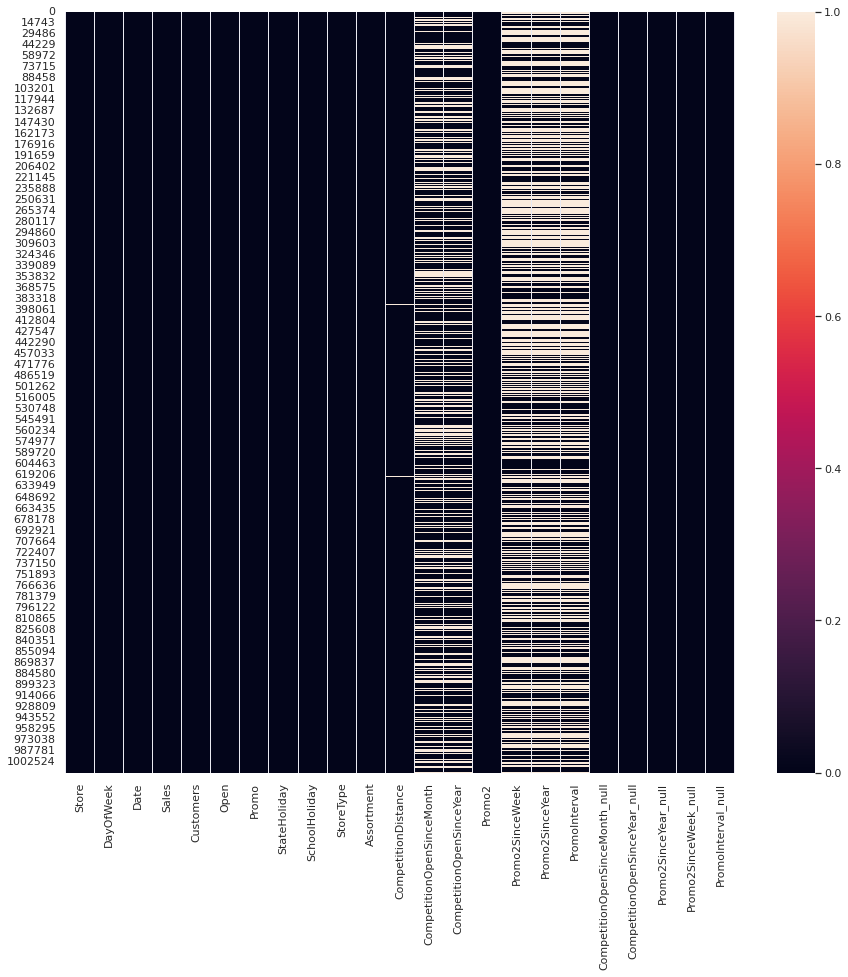

In [150]:
plt.figure(figsize=(15,14))
sns.heatmap(df3.isnull())

In [41]:
df3.dtypes

Store                               int64
DayOfWeek                           int64
Date                               object
Sales                               int64
Customers                           int64
Open                                int64
Promo                               int64
StateHoliday                       object
SchoolHoliday                       int64
StoreType                          object
Assortment                         object
CompetitionDistance               float64
CompetitionOpenSinceMonth         float64
CompetitionOpenSinceYear          float64
Promo2                              int64
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
PromoInterval                      object
CompetitionOpenSinceMonth_null      int64
CompetitionOpenSinceYear_null       int64
Promo2SinceYear_null                int64
Promo2SinceWeek_null                int64
PromoInterval_null                  int64
dtype: object

In [42]:
df3.select_dtypes(include=['int64','float64']).columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpenSinceMonth_null',
       'CompetitionOpenSinceYear_null', 'Promo2SinceYear_null',
       'Promo2SinceWeek_null', 'PromoInterval_null'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


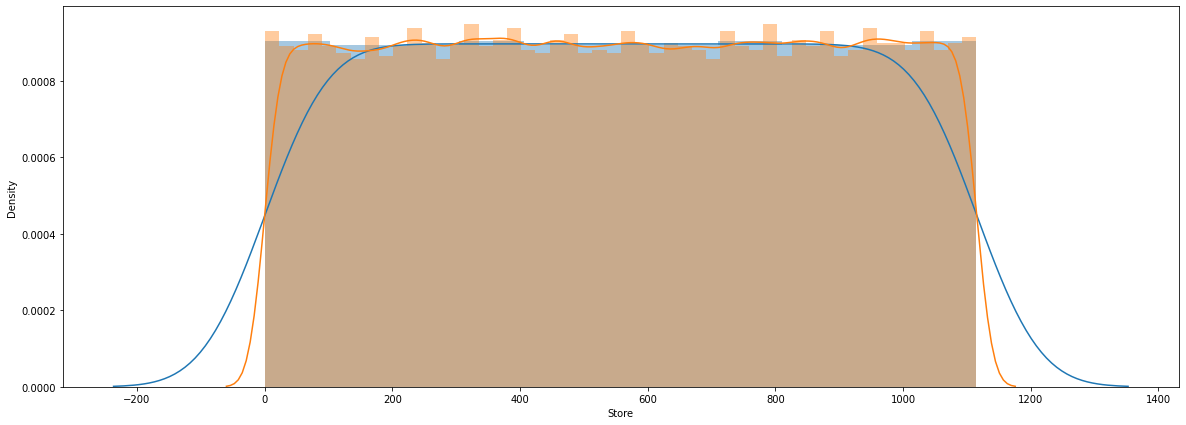

In [43]:
sns.distplot(df_store['Store'])
sns.distplot(df3['Store'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


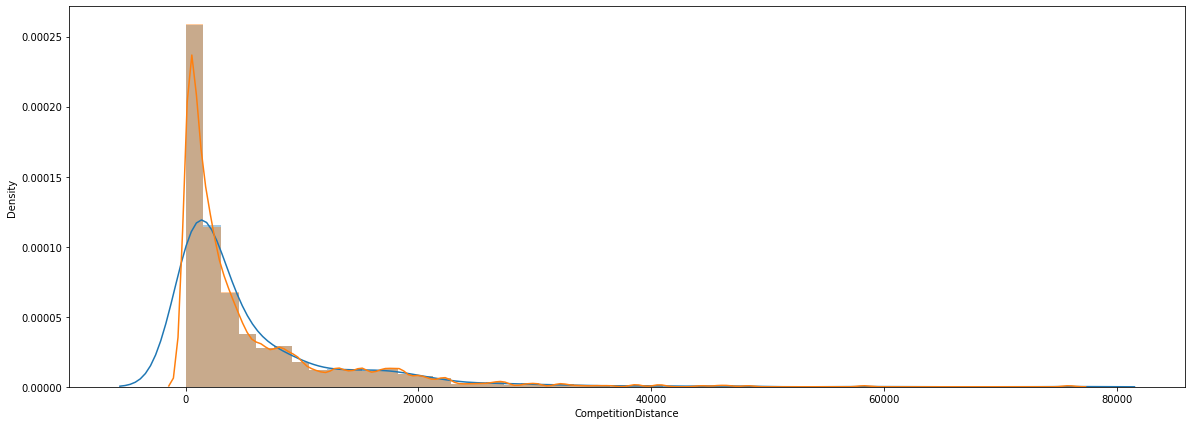

In [52]:
sns.distplot(df_store['CompetitionDistance'])
sns.distplot(df3['CompetitionDistance'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


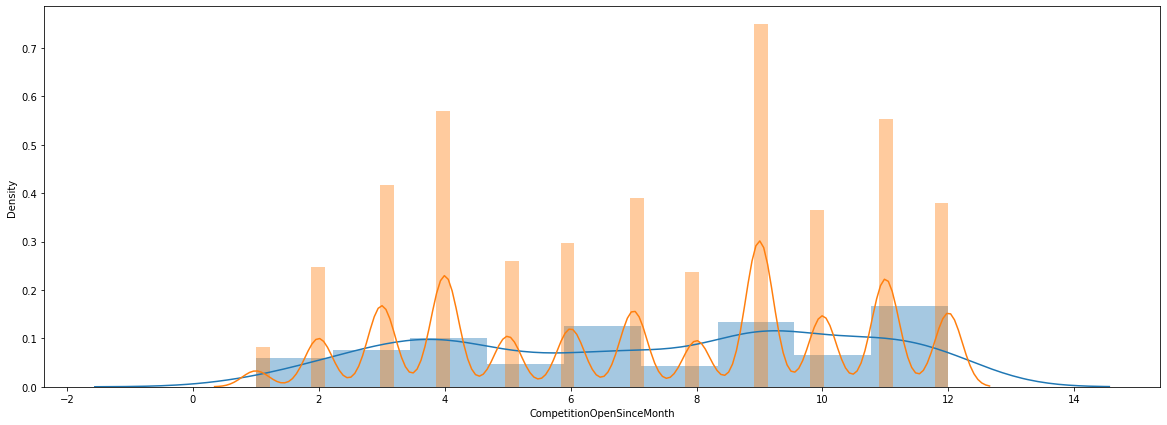

In [53]:
sns.distplot(df_store['CompetitionOpenSinceMonth'])
sns.distplot(df3['CompetitionOpenSinceMonth'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


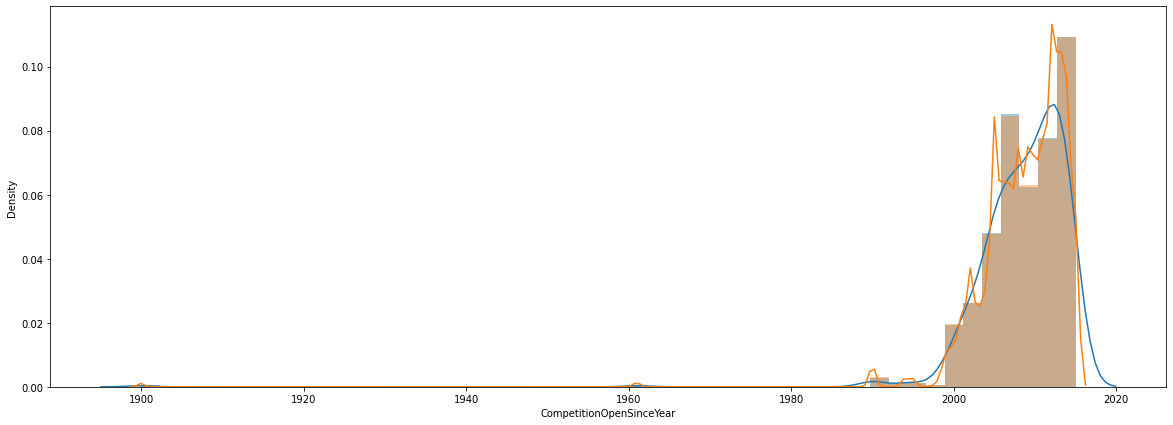

In [54]:
sns.distplot(df_store['CompetitionOpenSinceYear'])
sns.distplot(df3['CompetitionOpenSinceYear'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


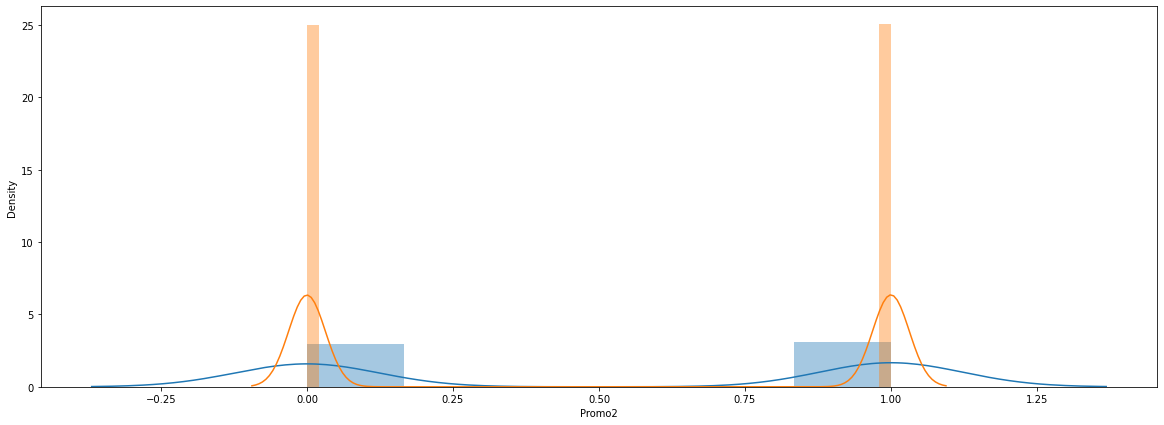

In [55]:
sns.distplot(df_store['Promo2'])
sns.distplot(df3['Promo2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

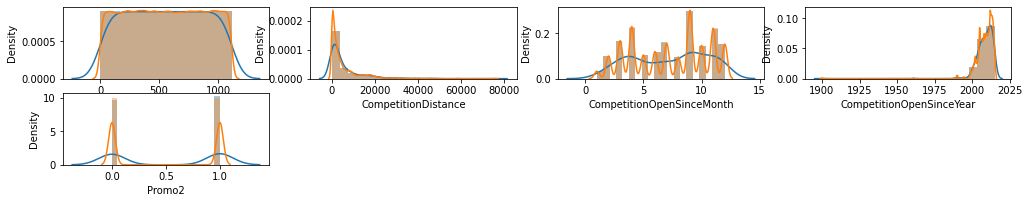

In [56]:
num_var=['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2']
plt.figure(figsize=(17,14))

for i, var in enumerate(num_var):
        plt.subplot(9,4,i+1)
        sns.distplot(df_store[var],bins=20)
        sns.distplot(df3[var],bins=20)
        
        sns.distplot()

In [57]:
df_store.isnull().sum()

Store                               0
StoreType                           0
Assortment                          0
CompetitionDistance                 3
CompetitionOpenSinceMonth         354
CompetitionOpenSinceYear          354
Promo2                              0
Promo2SinceWeek                   544
Promo2SinceYear                   544
PromoInterval                     544
CompetitionOpenSinceMonth_null      0
CompetitionOpenSinceYear_null       0
Promo2SinceYear_null                0
Promo2SinceWeek_null                0
PromoInterval_null                  0
dtype: int64

In [58]:
df3.isnull().sum()

Store                                  0
DayOfWeek                              0
Date                                   0
Sales                                  0
Customers                              0
Open                                   0
Promo                                  0
StateHoliday                           0
SchoolHoliday                          0
StoreType                              0
Assortment                             0
CompetitionDistance                 2642
CompetitionOpenSinceMonth         323348
CompetitionOpenSinceYear          323348
Promo2                                 0
Promo2SinceWeek                   508031
Promo2SinceYear                   508031
PromoInterval                     508031
CompetitionOpenSinceMonth_null         0
CompetitionOpenSinceYear_null          0
Promo2SinceYear_null                   0
Promo2SinceWeek_null                   0
PromoInterval_null                     0
dtype: int64

In [163]:
df3.select_dtypes(include=['int64','float64']).columns



Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpenSinceMonth_null',
       'CompetitionOpenSinceYear_null', 'Promo2SinceYear_null',
       'Promo2SinceWeek_null', 'PromoInterval_null'],
      dtype='object')

In [59]:
missing_num_var = [var for var in df3.columns if df3[var].isnull().sum()>0]
missing_num_var

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

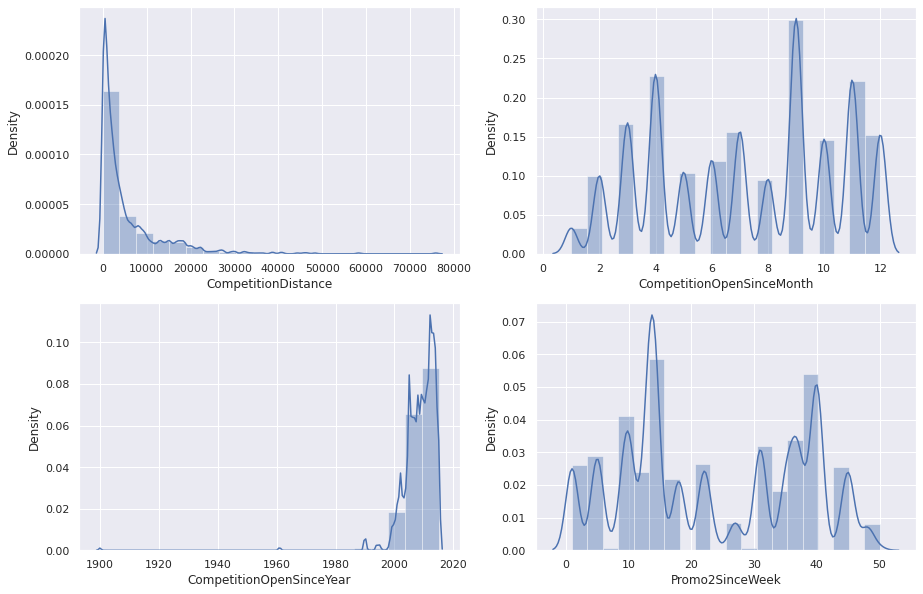

In [61]:
plt.figure(figsize=(15,10))
sns.set()

for i, var in enumerate(missing_num_var):
        plt.subplot(2,2,i+1)
        sns.distplot(df3[var],bins=20)
        

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

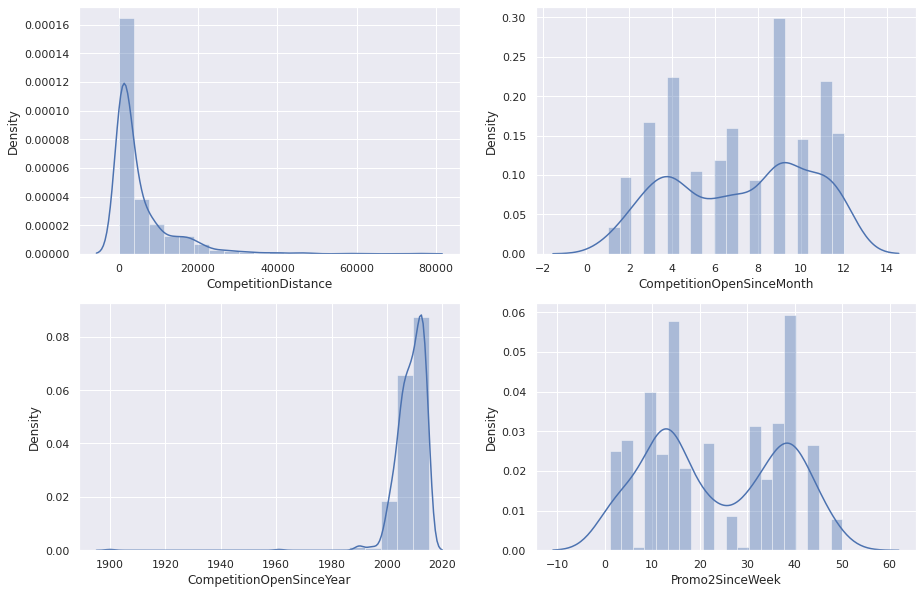

In [62]:
missing_num_var1 = [var for var in df_store.columns if df_store[var].isnull().sum()>0]
missing_num_var1
plt.figure(figsize=(15,10))
sns.set()

for i, var in enumerate(missing_num_var1):
        plt.subplot(2,2,i+1)
        sns.distplot(df_store[var],bins=20)
        

In [63]:
df_median=df3.fillna(df3.median())
df_median.isnull().sum().sum()
df_mean=df3.fillna(df3.mean())
df_mean.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


508031

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

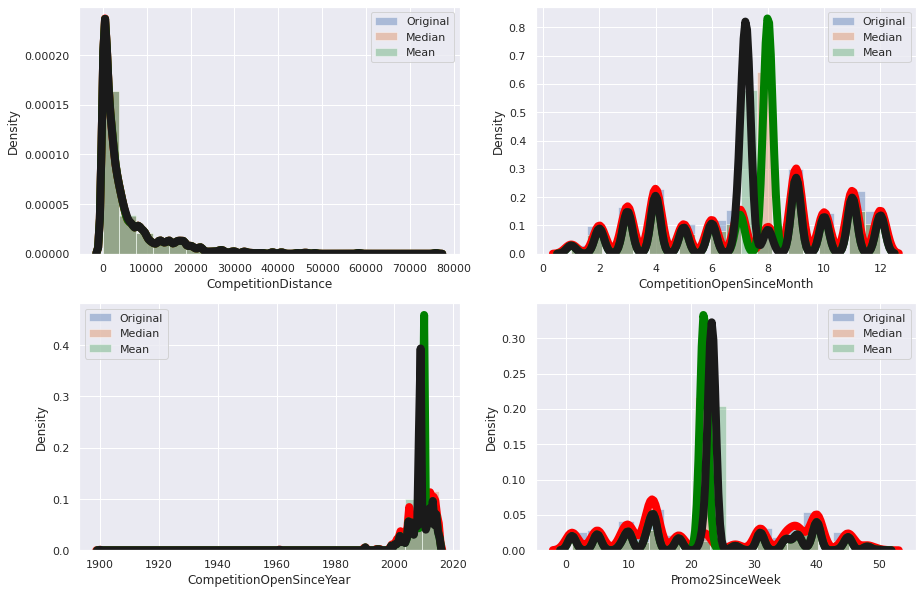

In [64]:
missing_num_var1 = [var for var in df_store.columns if df_store[var].isnull().sum()>0]
missing_num_var1
plt.figure(figsize=(15,10))
sns.set()

for i, var in enumerate(missing_num_var1):
        plt.subplot(2,2,i+1)
        sns.distplot(df3[var],bins=20,label="Original",kde_kws={'linewidth':8,'color':'red'})
        sns.distplot(df_median[var],bins=20,label="Median",kde_kws={'linewidth':8,'color':'green'})
        sns.distplot(df_mean[var],bins=20,label="Mean",kde_kws={'linewidth':8,'color':'k'})
        plt.legend()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

TypeError: ignored

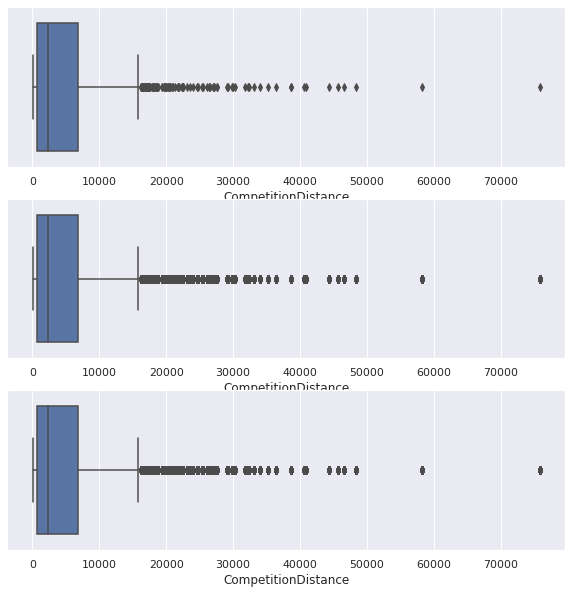

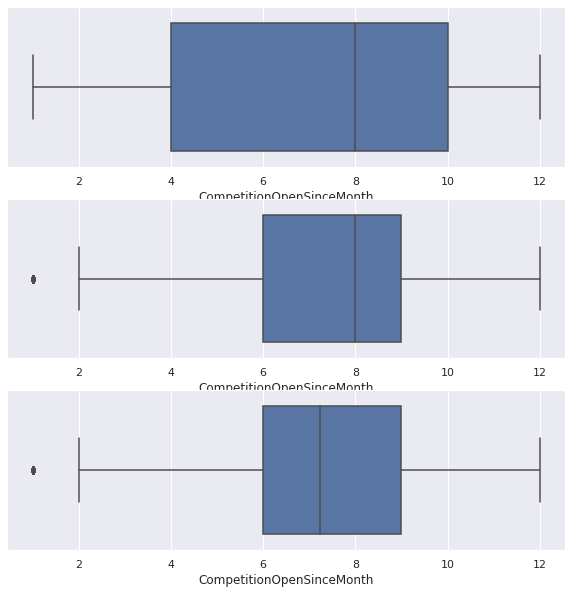

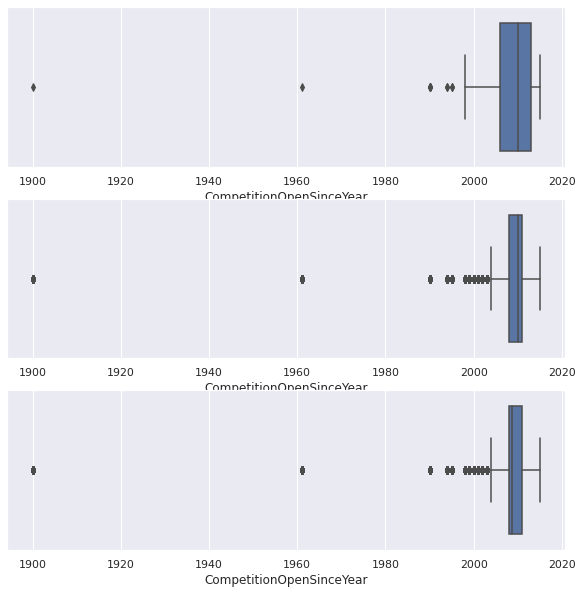

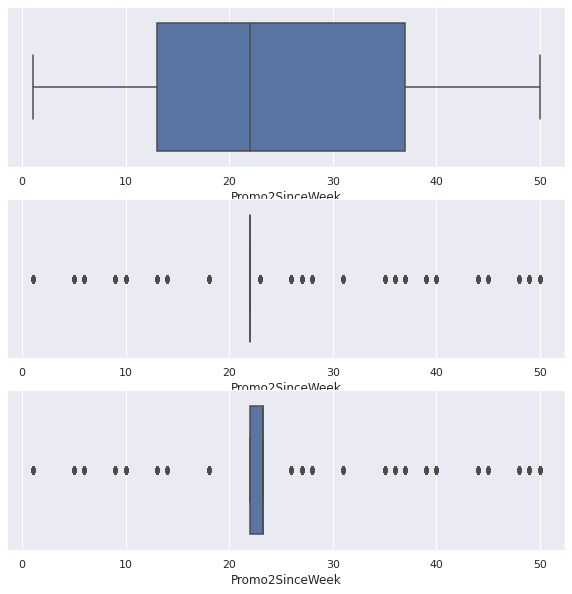

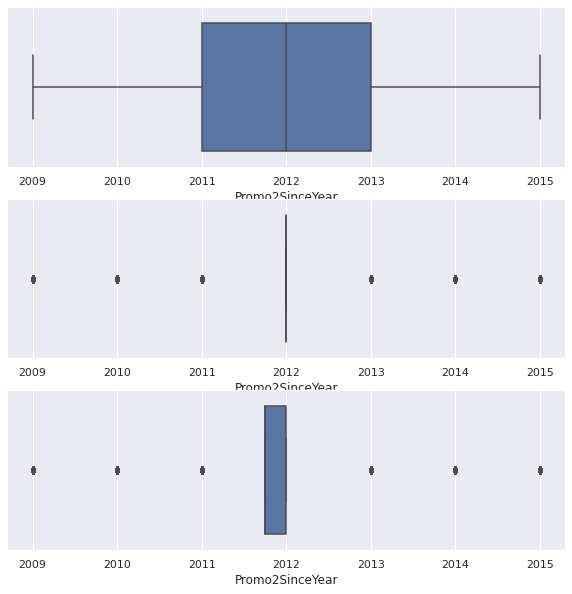

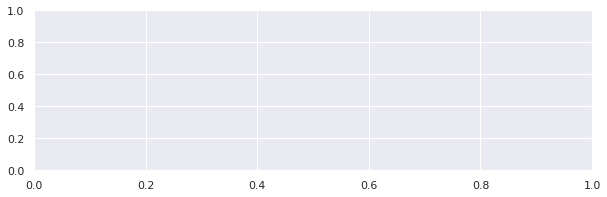

In [65]:
for i , var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df_store[var])
    plt.subplot(3,1,2)
    sns.boxplot(df_median[var])
    plt.subplot(3,1,3)
    sns.boxplot(df_mean[var])




In [66]:
df_median[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2']].corr()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
CompetitionDistance,1.000000,-0.051053,0.021338,-0.139228
CompetitionOpenSinceMonth,-0.051053,1.000000,-0.043056,0.005462
CompetitionOpenSinceYear,0.021338,-0.043056,1.000000,-0.051383
Promo2,-0.139228,0.005462,-0.051383,1.000000


In [67]:
df_mean[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2']].corr()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
CompetitionDistance,1.000000,-0.051738,0.021322,-0.139704
CompetitionOpenSinceMonth,-0.051738,1.000000,-0.060594,-0.007733
CompetitionOpenSinceYear,0.021322,-0.060594,1.000000,-0.063737
Promo2,-0.139704,-0.007733,-0.063737,1.000000


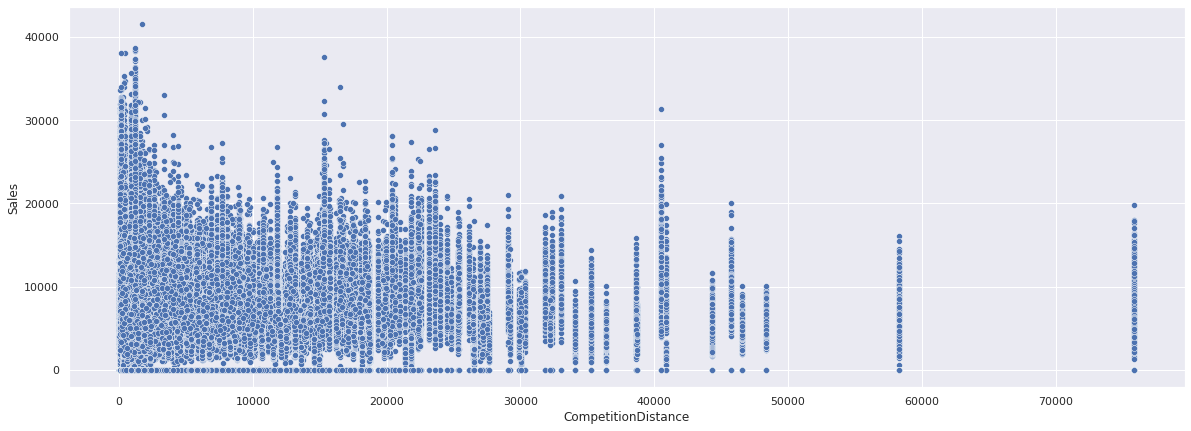

In [72]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df_median['CompetitionDistance'], y=df_median['Sales'])

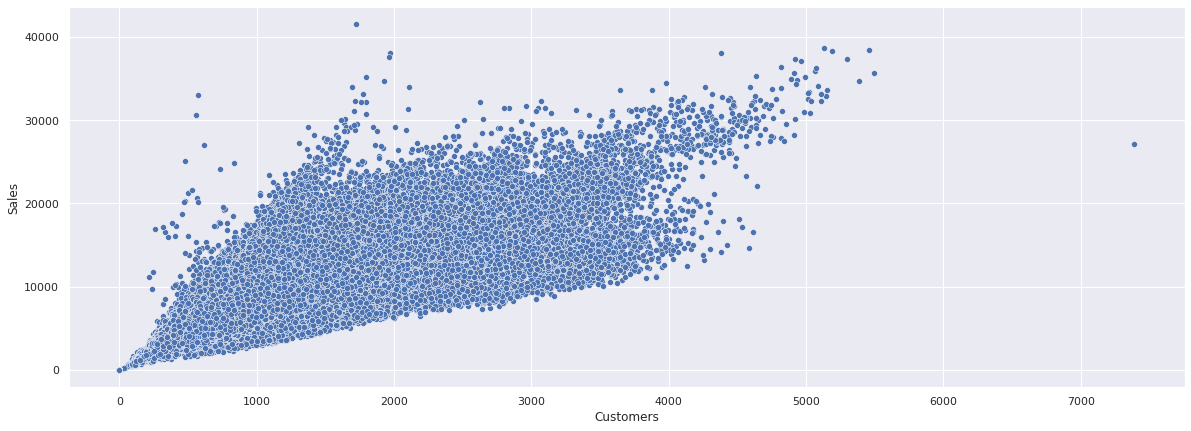

In [70]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df_mean['Customers'], y=df_mean['Sales'])

In [73]:
# Value_counts of StateHoliday Column
df_mean.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [74]:
# extract year, month, day and week of year from "Date"

df_mean['Date']=pd.to_datetime(df_mean['Date'])
df_mean['Year'] = df_mean['Date'].apply(lambda x: x.year)
df_mean['Month'] = df_mean['Date'].apply(lambda x: x.month)
df_mean['Day'] = df_mean['Date'].apply(lambda x: x.day)
df_mean['WeekOfYear'] = df_mean['Date'].apply(lambda x: x.weekofyear)

In [75]:
df_mean.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
df_mean.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth_null,CompetitionOpenSinceYear_null,Promo2SinceYear_null,Promo2SinceWeek_null,PromoInterval_null,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct",0,0,0,0,0,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct",0,0,0,0,0,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,23.269093,2011.752774,NaN,0,0,1,1,1,2015,7,31,31


In [76]:
df_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [78]:
#No. Of Stores in the Dataset
df_store.nunique()

Store                             1115
StoreType                            4
Assortment                           3
CompetitionDistance                654
CompetitionOpenSinceMonth           12
CompetitionOpenSinceYear            23
Promo2                               2
Promo2SinceWeek                     24
Promo2SinceYear                      7
PromoInterval                        3
CompetitionOpenSinceMonth_null       2
CompetitionOpenSinceYear_null        2
Promo2SinceYear_null                 2
Promo2SinceWeek_null                 2
PromoInterval_null                   2
dtype: int64

In [79]:
# Value_counts of StateHoliday Column
df_sales.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

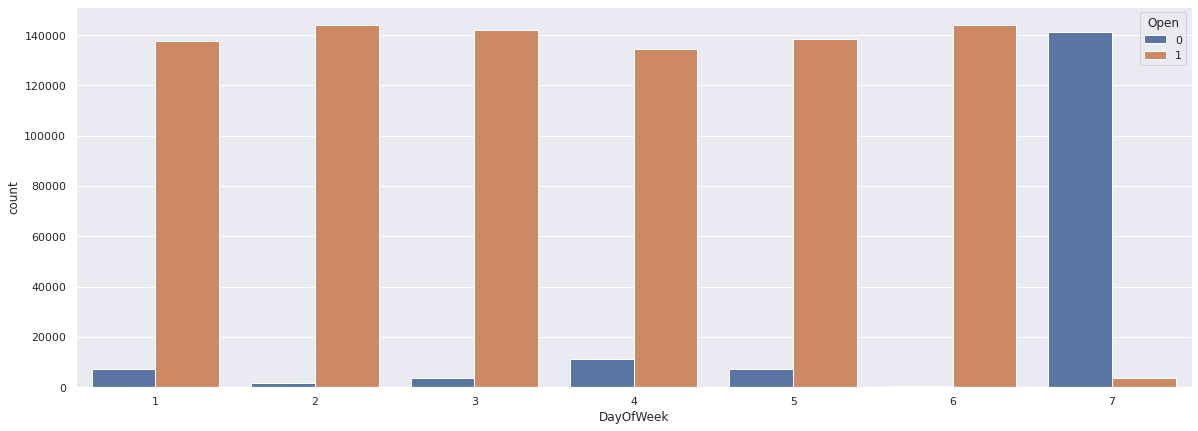

In [81]:

sns.countplot(x='DayOfWeek',hue='Open',data=df_mean)